# Pose Overlay Video
This notebook demonstrates how to:
1. Download a badminton video
2. Extract frames
3. Analyze poses using MediaPipe
4. Visualize landmark motion

In [1]:
import sys
import os
import glob
import pandas as pd
import matplotlib.pyplot as plt

# Add the src folder to the system path
sys.path.append(os.path.abspath('../src'))

from download_video import download_video
from extract_frames import extract_frames
from analyze_pose import analyze_poses

I0000 00:00:1755530581.282196 3858213 gl_context.cc:369] GL version: 2.1 (2.1 Metal - 89.4), renderer: Apple M1


In [2]:
# 📥 Step 1: Download a YouTube Video
video_url = "https://www.youtube.com/watch?v=OvP4cwq5JDQ"  # Replace this
video_dir = download_video(video_url) # Download the video. Function returns the path to the downloaded video file.

INFO: Created TensorFlow Lite XNNPACK delegate for CPU.
W0000 00:00:1755530581.392090 3858339 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1755530581.409177 3858336 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


[youtube] Extracting URL: https://www.youtube.com/watch?v=OvP4cwq5JDQ
[youtube] OvP4cwq5JDQ: Downloading webpage
[youtube] OvP4cwq5JDQ: Downloading tv client config
[youtube] OvP4cwq5JDQ: Downloading tv player API JSON
[youtube] OvP4cwq5JDQ: Downloading ios player API JSON
[youtube] OvP4cwq5JDQ: Downloading m3u8 information
[info] OvP4cwq5JDQ: Downloading 1 format(s): 18
[download] Destination: ../data/raw/10ce8bb6beb5aae55712e4823512f6a97bb75eea0f65233cd229f24b4ddba071.mp4
[download] 100% of    4.63MiB in 00:00:00 at 15.24MiB/s  


In [3]:
# 🖼️ Step 2: Extract Frames
frame_dir = f'../data/output/frames/{video_url}'

# Only extract if no frames are found
if not os.path.exists(frame_dir) or not glob.glob(os.path.join(frame_dir, '*.jpg')):
    extract_frames(video_dir, frame_dir)
else:
    print(f"Frames already extracted in {frame_dir}")

Frames already extracted in ../data/output/frames/https://www.youtube.com/watch?v=OvP4cwq5JDQ


In [4]:
# 🧍 Step 3: Analyze Pose
pose_csv_path = "../data/output/pose_data.csv"

if not os.path.exists(pose_csv_path):
    analyze_poses(frame_dir=frame_dir)
else:
    print(f"Pose data already exists at {pose_csv_path}")

Pose data already exists at ../data/output/pose_data.csv


In [5]:
# 📊 Step 4: Load and Inspect Pose Data
df = pd.read_csv("../data/output/pose_data.csv")
df.head()

,frame,x_0,y_0,z_0,x_1,y_1,z_1,x_2,y_2,z_2,...,z_29,x_30,y_30,z_30,x_31,y_31,z_31,x_32,y_32,z_32
0,frame_0.jpg,0.425402,0.241831,-0.103414,0.419456,0.217561,-0.085290,0.418018,0.216477,-0.085357,...,0.329267,0.346707,1.166763,0.064805,0.363101,1.160089,0.280228,0.400645,1.214804,0.003063
1,frame_10.jpg,0.433217,0.236106,-0.085025,0.427102,0.210647,-0.065653,0.425723,0.209540,-0.065735,...,0.354437,0.365058,1.184804,0.140409,0.359895,1.172277,0.308726,0.430196,1.216797,0.081336
2,frame_1115.jpg,0.437174,0.315882,-0.459530,0.431915,0.275047,-0.421561,0.432624,0.273924,-0.421636,...,0.921710,0.269478,1.916264,0.478049,0.427793,1.893373,0.767081,0.370335,1.935806,0.255899
3,frame_1120.jpg,0.404035,0.366004,-0.234103,0.396053,0.323785,-0.196120,0.396086,0.321936,-0.196188,...,0.173019,0.473517,0.911066,-0.026793,0.600442,0.650648,0.075997,0.558410,0.824216,-0.123271
4,frame_1125.jpg,0.364062,0.265231,0.151609,0.371156,0.248946,0.179460,0.373498,0.251220,0.179361,...,-0.284357,0.135033,0.970143,-0.450377,0.300163,0.992815,-0.356859,0.152361,0.985969,-0.548229


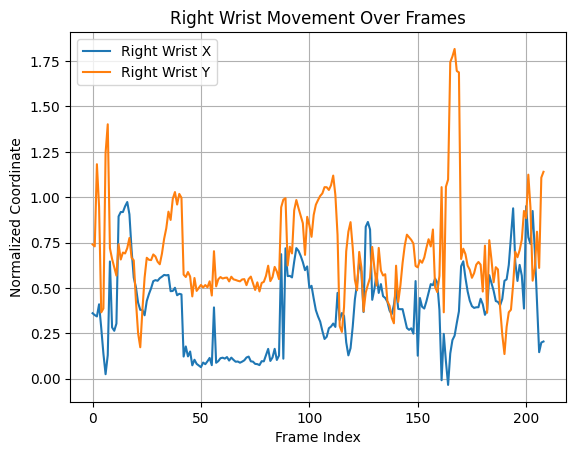

In [6]:
# 📈 Step 5: Visualize Right Wrist Movement
plt.plot(df["x_16"], label="Right Wrist X")
plt.plot(df["y_16"], label="Right Wrist Y")
plt.legend()
plt.title("Right Wrist Movement Over Frames")
plt.xlabel("Frame Index")
plt.ylabel("Normalized Coordinate")
plt.grid(True)
plt.show()

I0000 00:00:1755530584.502528 3858213 gl_context.cc:369] GL version: 2.1 (2.1 Metal - 89.4), renderer: Apple M1
W0000 00:00:1755530584.582941 3858363 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1755530584.598118 3858368 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1755530584.616490 3858364 landmark_projection_calculator.cc:186] Using NORM_RECT without IMAGE_DIMENSIONS is only supported for the square ROI. Provide IMAGE_DIMENSIONS or use PROJECTION_MATRIX.


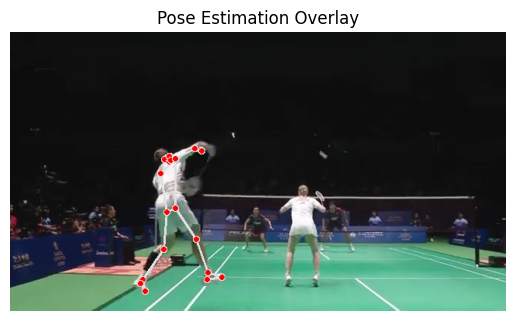

In [7]:
# ✅ Optional: Pose Overlay on One Frame
import cv2
import mediapipe as mp

mp_drawing = mp.solutions.drawing_utils
mp_pose = mp.solutions.pose

frame_path = f"{frame_dir}/frame_2000.jpg"  # Adjust frame number
img = cv2.imread(frame_path)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

pose = mp_pose.Pose(static_image_mode=True)
results = pose.process(img_rgb)

if results.pose_landmarks:
    mp_drawing.draw_landmarks(img, results.pose_landmarks, mp_pose.POSE_CONNECTIONS)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.title("Pose Estimation Overlay")
    plt.show()
else:
    print("No pose detected.")

In [8]:
# Pose Overlay Video ✅ Option 2: OpenCV Window (Real-time Playback, Local Only)

cap = cv2.VideoCapture(video_dir)
pose = mp.solutions.pose.Pose()
mp_drawing = mp.solutions.drawing_utils

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    results = pose.process(rgb)

    if results.pose_landmarks:
        mp_drawing.draw_landmarks(frame, results.pose_landmarks, mp.solutions.pose.POSE_CONNECTIONS)

    cv2.imshow("Pose Detection", frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

I0000 00:00:1755530584.693781 3858213 gl_context.cc:369] GL version: 2.1 (2.1 Metal - 89.4), renderer: Apple M1
W0000 00:00:1755530584.777496 3858383 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1755530584.794167 3858379 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


## Conclusion

Minor conclusions: 
- The mediapipe model seems more specialized for rather detailed and fine-grained poses for use cases, e.g. sign language detection. 
- It seems to perform worse for estimating more dynamic poses like in fast-paced sports? 

Major conclusions: 
- Further it can only estimate poses for a single person in the video, which might be a restriction later for simultaneously analyzing a player and opponent or even more players in doubles 